In [3]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
#data
X_data, Y_data=datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=3)
X=torch.from_numpy(X_data.astype(np.float32))
Y=torch.from_numpy(Y_data.astype(np.float32))
Y=Y.view(Y.shape[0],1) #column vector

In [5]:
n_samples, n_features=X.shape

In [6]:
learning_rate=0.01

In [7]:
#model
model=nn.Linear(n_features,1) #y=wx+b

In [8]:
#loss and optimizer
loss=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
#training loop
num_epochs=100
for epoch in range(num_epochs):
    #forward pass
    Y_pred=model(X)
    l=loss(Y_pred,Y)
    #backward pass
    l.backward()
    #update weights
    optimizer.step()
    #zero gradients
    optimizer.zero_grad()
    
    if (epoch+1)%10==0:
        print(f'epoch: {epoch+1}, loss={l.item()}')


epoch: 10, loss=935.4724731445312
epoch: 20, loss=707.281494140625
epoch: 30, loss=564.584716796875
epoch: 40, loss=475.2078857421875
epoch: 50, loss=419.13165283203125
epoch: 60, loss=383.8841552734375
epoch: 70, loss=361.6856689453125
epoch: 80, loss=347.6764831542969
epoch: 90, loss=338.8162536621094
epoch: 100, loss=333.1996765136719


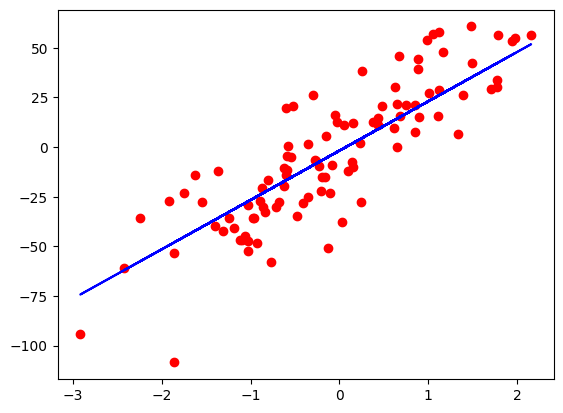

In [11]:
#plot
predicted=model(X).detach().numpy()
plt.plot(X_data,Y_data,'ro') #original
plt.plot(X_data,predicted,'b') #predicted
plt.show()